In [6]:
# import libraries

import numpy as np
import pandas as pd

#file path
excel_path=r'C:\Users\ASUS\OneDrive\Documents\Abroad_Data_Analysis.xlsx'

#assign file path
data = pd.read_excel(excel_path, sheet_name=None)


In [25]:
# View all data from sheets
sheet1_data=data['Year_wise List'] #sheet1
print(sheet1_data)

   YEAR  TOTAL STUDENTS
0  2017          454009
1  2018          517998
2  2019          586337
3  2020          259655
4  2021          444553
5  2022          750365


In [24]:
sheet2_data=data['State_Wise List'] #sheet2
print(sheet2_data)

                                              STATES    Number  Percentage
0                                              AP/TS   93750.0        12.5
1                                             Punjab   93750.0        12.5
2                                         Maharastra   82500.0        11.0
3                                            Gujarat   60000.0         8.0
4                                         Tamil Nadu   52500.0         7.0
5                                          Karnataka   37500.0         5.0
6                                             Others  330000.0        44.0
7                                                NaN       NaN         NaN
8  NOTE: Let's consider total students be 750000 ...       NaN         NaN


In [23]:
sheet3_data=data['Est. studying in abroad'] #sheet3
print(sheet3_data)

    S.No.     Country No. of Students
0     1.0     Armenia            8015
1     2.0   Australia          100009
2     3.0     Austria             350
3     4.0  Azerbaijan             119
4     5.0  Bangladesh            9308
..    ...         ...             ...
75   76.0         USA          465791
76   77.0  Uzbekistan             250
77   78.0   Venezuela              93
78   79.0     Vietnam               4
79    NaN       Total       13,24,954

[80 rows x 3 columns]


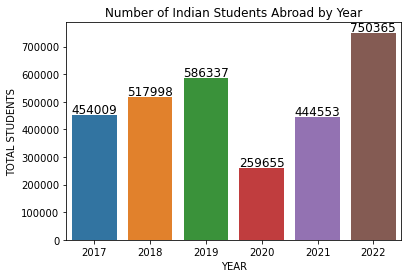

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the number of students by year
sheet1_data=data['Year_wise List']
ax=sns.barplot(x='YEAR', y='TOTAL STUDENTS', data=sheet1_data)
plt.xlabel('YEAR')
plt.ylabel('TOTAL STUDENTS')
plt.title('Number of Indian Students Abroad by Year')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

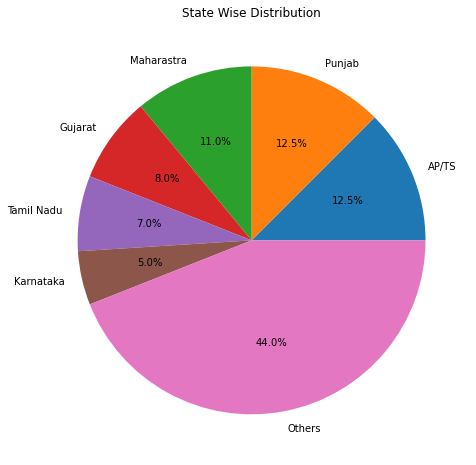

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
sheet2_name = 'State_Wise List'  # Sheet name

# Load the specific sheet from the Excel file
data_state_wise = pd.read_excel(excel_path, sheet_name=sheet2_name)

# Remove rows with NaN values in the 'Number' column
data_state_wise_cleaned = data_state_wise.dropna(subset=['Number'])

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(data_state_wise_cleaned['Number'], labels=data_state_wise_cleaned['STATES'], autopct='%1.1f%%')
plt.title('State Wise Distribution')
plt.show()


In [26]:
sheet3_name = 'Est. studying in abroad'  # Sheet name

# Load the specific sheet from the Excel file
data_abroad = pd.read_excel(excel_path, sheet_name=sheet3_name)

# Convert 'No. of Students' to numeric values, handling non-numeric data
data_abroad['No. of Students'] = pd.to_numeric(data_abroad['No. of Students'], errors='coerce').fillna(0).astype(int)


# Sort the data by 'No. of Students' in descending order and select the top 15
top_15_abroad = data_abroad.sort_values(by='No. of Students', ascending=False)[['Country','No. of Students']] .head(15)

# Display the top 15 places
top_15_abroad

,Country,No. of Students
75,USA,465791
11,Canada,183310
73,United Arab Emirates,164000
1,Australia,100009
57,Saudi Arabia,65800
74,United Kingdom,55465
53,Qatar,46000
48,Oman,39550
22,Germany,34864
56,Russia Federation,18039


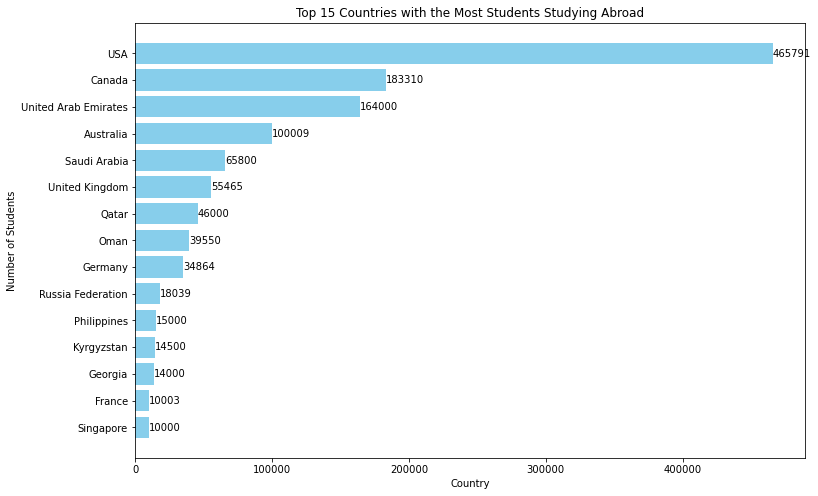

In [33]:
sheet3_name = 'Est. studying in abroad'  # Sheet name

# Load the specific sheet from the Excel file
data_abroad = pd.read_excel(excel_path, sheet_name=sheet3_name)

# Create a bar chart of top 15 countries
plt.figure(figsize=(12, 8))
bars=plt.barh(top_15_abroad['Country'], top_15_abroad['No. of Students'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Students')
plt.title('Top 15 Countries with the Most Students Studying Abroad')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the most students at the top

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')
plt.show()

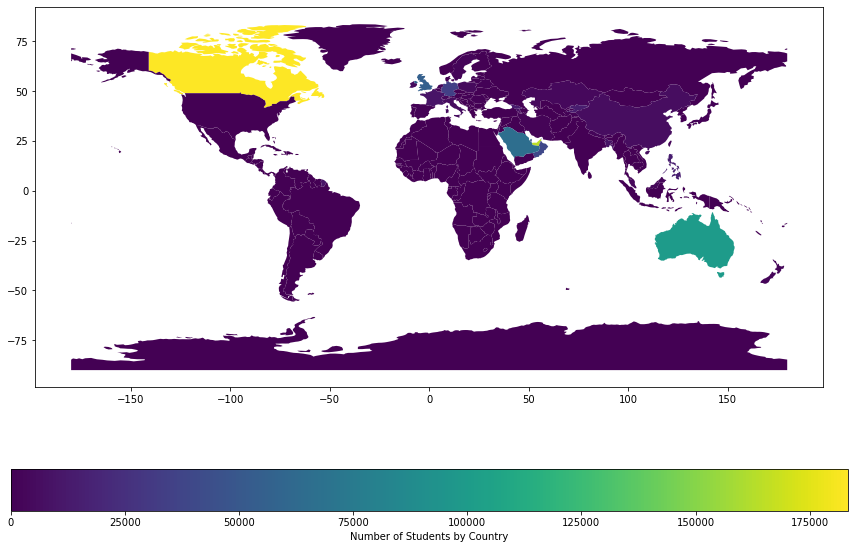

In [35]:
import geopandas as gpd


# Convert 'No. of Students' to numeric and handle errors
data_abroad['No. of Students'] = pd.to_numeric(data_abroad['No. of Students'], errors='coerce').fillna(0)

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your data with the world map data
world = world.merge(data_abroad, how='left', left_on='name', right_on='Country')

# Replace NaN in 'No. of Students' with 0 for countries with no data
world['No. of Students'] = world['No. of Students'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='No. of Students', ax=ax, legend=True,
           legend_kwds={'label': "Number of Students by Country",
                        'orientation': "horizontal"})
plt.show()